# Data Mining

<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">Story:</p>


As a data scientist at ABC company, a non-profit organization dedicated to promoting the dissemination of free knowledge and supporting collaborative platforms like Wikipedia, I have been tasked with optimizing the administrator election process on Wikipedia. Administrators play a vital role in maintaining the integrity and quality of Wikipedia, and it is essential to identify users who are likely to become successful administrators efficiently. 

In this context, the project aims to analyze the voting patterns and network structure of Wikipedia's administrator elections. By leveraging graph analysis and edge prediction techniques, the goal is to predict potential future successful adminship candidates and streamline the election process. This will help Wikipedia ensure that qualified users are identified and promoted more efficiently, thereby enhancing the platform's maintenance and user experience.

The experiment begins with data collection and preparation, utilizing the latest complete dump of Wikipedia page edit history from January 3, 2008. The data is structured into a graph where nodes represent Wikipedia users and directed edges represent votes. Key graph metrics such as clustering coefficient, number of triangles, diameter, and effective diameter are calculated. The distribution of nodes and edges in the largest weakly connected component (WCC) and strongly connected component (SCC) is analyzed to identify patterns and characteristics of successful vs. unsuccessful administrator elections. The role of existing administrators in the voting process is also examined.

Next, feature engineering is conducted to create features based on user activity, voting patterns, and graph metrics. These features include the number of votes received, voting history, and the user's centrality in the network. The data is then split into training and validation sets, and edge prediction models are trained using techniques like logistic regression, random forests, SVM. The models are evaluated based on accuracy, precision, recall, and F1-score.

Once the models are trained, they are applied to predict potential successful candidates for future administrator elections. A list of top candidates is generated based on prediction scores, and the prediction system is integrated with Wikipedia's adminship request process. Feedback from the Wikipedia community is collected to refine and improve the model.

**The expected value of this project includes streamlining the administrator election process by identifying promising candidates early, thereby reducing the time and effort required for community discussions and votes. It ensures that qualified and capable users are promoted to administrators, enhancing Wikipedia's maintenance and user experience. Additionally, the project builds trust within the Wikipedia community by making the adminship process more transparent and data-driven, encouraging more users to participate, knowing that it is fair and efficient.**

By utilizing graph analysis and edge prediction, ABC aims to enhance Wikipedia's administrator election process. This project supports the efficiency and quality of Wikipedia's administration and fosters a more robust and trustworthy community, aligning with ABC's mission of promoting free knowledge and collaboration.

<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">The Data:</p>


### Source: https://snap.stanford.edu/data/wiki-Vote.html

Wikipedia is a free encyclopedia collaboratively written by volunteers worldwide. A small segment of Wikipedia contributors serve as administrators, users with additional technical features for site maintenance. To become an administrator, a user must issue a Request for Adminship (RfA), which the Wikipedia community then discusses or votes on to decide who gets promoted. Utilizing the latest complete dump of Wikipedia page edit history from January 3, 2008, all administrator elections and vote history data were extracted, resulting in a dataset of 2,794 elections with 103,663 total votes and 7,066 users participating in the elections (either casting a vote or being voted on). Among these, 1,235 elections led to successful promotions, while 1,559 did not. Approximately half of the votes in the dataset are from existing administrators, with the other half coming from ordinary Wikipedia users.

**In this network, nodes represent Wikipedia users, and a directed edge from node i to node j signifies that user i voted on user j.**


**Dataset statistics:**

Nodes:	7115

Edges:	103689

Nodes in largest WCC:	7066 (0.993)

Edges in largest WCC:	103663 (1.000)

Nodes in largest SCC:	1300 (0.183)

Edges in largest SCC:	39456 (0.381)

Average clustering coefficient:	0.1409

Number of triangles:	608389

Fraction of closed triangles:	0.04564

Diameter (longest shortest path):	7

90-percentile effective diameter:	3.8

The dataset is suitable for this project as it effectively captures the directed voting relationships between Wikipedia users. This structure allows for the construction of a user interaction network, where nodes represent users and directed edges indicate votes cast from one user to another. This setup is ideal for graph analysis and edge prediction tasks, enabling the exploration of voting patterns and the identification of potential future successful administrator candidates.

<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">IDA:</p>


**Libraries:**

In [1]:
import pandas as pd
import networkx as nx
import warnings
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Dataset:**

In [2]:
df = pd.read_csv('Wiki-Vote.txt', delimiter='\t')
df.shape

(103689, 2)

In [3]:
df.head()

,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


**Creating Graph**

In [4]:
warnings.filterwarnings('ignore')

# Create a directed graph
G = nx.DiGraph()

# Add edges from the DataFrame to the graph
for index, row in df.iterrows():
    G.add_edge(row['FromNodeId'], row['ToNodeId'])

nx.info(G)

'DiGraph with 7115 nodes and 103689 edges'

**Primary overview of the graph:**

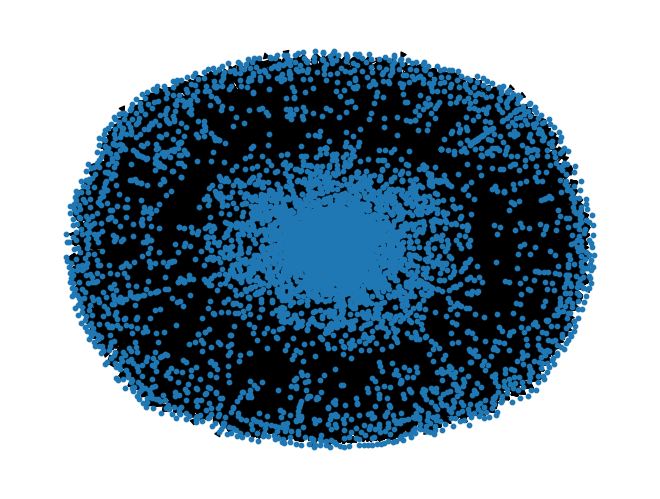

In [5]:
nx.draw(G, with_labels=False, node_size=10)
plt.show()


**Chart N1**

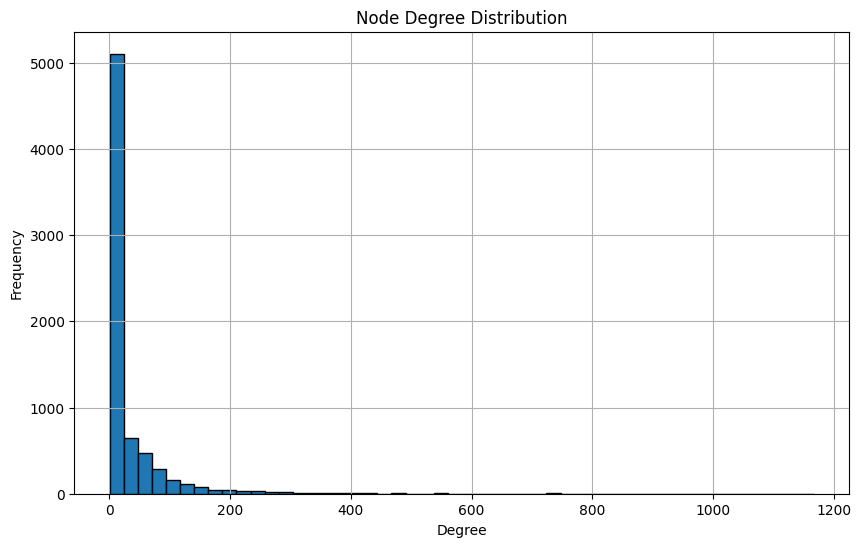

Mean degree: 29.146591707659873
Median degree: 4.0
Maximum degree: 1167
Minimum degree: 1
Number of nodes: 7115
Number of edges: 103689


In [6]:

# Calculate node degrees
degrees = [deg for _, deg in G.degree()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, edgecolor='black')
plt.title('Node Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Statistical summary of degrees
print(f"Mean degree: {np.mean(degrees)}")
print(f"Median degree: {np.median(degrees)}")
print(f"Maximum degree: {np.max(degrees)}")
print(f"Minimum degree: {np.min(degrees)}")
print(f"Number of nodes: {len(degrees)}")
print(f"Number of edges: {G.number_of_edges()}")


### The chart above  shows the frequency of nodes at various degrees within a network.

- **Degree Frequency**: Most nodes have a degree less than 100, with a steep decline in frequency as the degree value increases.
- **Notable Observations**: There's a significant drop after 0-50 degrees, and nodes with degrees over 200 are rare.

### **Statistical features:**

- Mean Degree: The average degree of nodes in network is approximately 29.15.
- Median Degree: The median degree (where half of the nodes have degrees less than or equal to 4) is 4.
- Maximum Degree: The highest degree observed is 1167.
- Minimum Degree: The lowest degree is 1.
- Number of Nodes: Network contains 7115 nodes.
- Number of Edges: There are 103689 edges connecting these nodes.

**Chart N2**

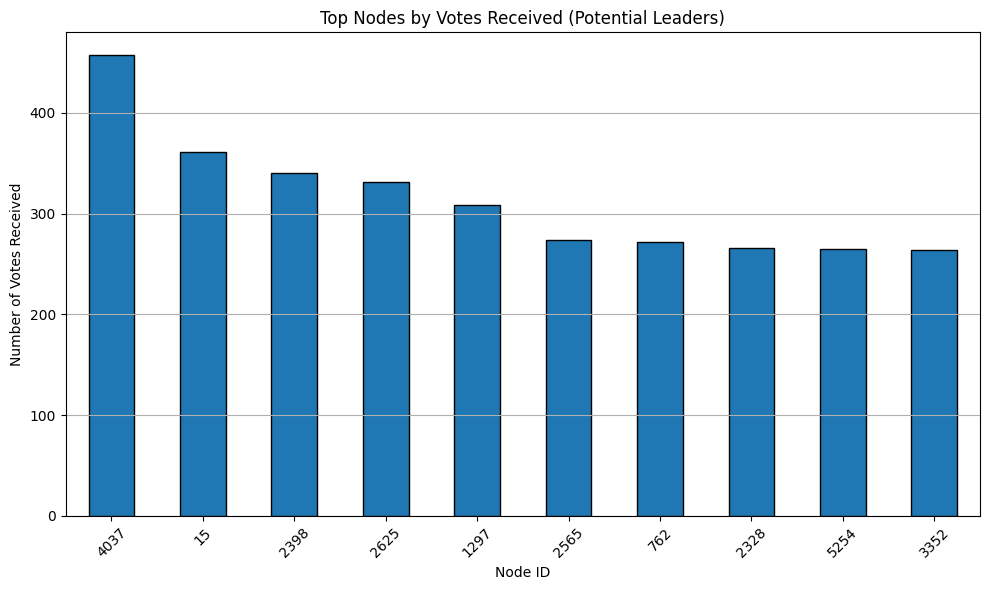

Top Nodes by Votes Received:
ToNodeId
4037    457
15      361
2398    340
2625    331
1297    309
2565    274
762     272
2328    266
5254    265
3352    264
Name: count, dtype: int64


In [7]:
# Count votes received by each node
votes_received = df['ToNodeId'].value_counts()

top_nodes = votes_received.head(10)  
plt.figure(figsize=(10, 6))
top_nodes.plot(kind='bar', edgecolor='black')
plt.title('Top Nodes by Votes Received (Potential Leaders)')
plt.xlabel('Node ID')
plt.ylabel('Number of Votes Received')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Top Nodes by Votes Received:")
print(top_nodes)


### The chart represents the number of votes received by top 10 nodes, which are likely candidates for being key influencers or leaders within a network.

- **Node ID 4037**: Received the most votes, around 460, indicating it might be the most influential or popular node followed by ID 15 and ID 2398.

<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">Graph Properties:</p>


In [8]:
G = nx.from_pandas_edgelist(df, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

# Basic graph statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Graph density: {density:.4f}") #Density (how many edges are present compared to the total possible edges)


Number of nodes: 7115
Number of edges: 103689
Graph density: 0.0020


- **Graph Density**: The density is 0.000204, a measure of how many edges are present compared to the total possible edges in the graph.

A low density indicates a sparse graph, meaning that on average, nodes have few connections relative to the total number of nodes. This can be typical for large networks where not every node is connected to every other node.




In [9]:
# Connected components
components = list(nx.weakly_connected_components(G))  # for directed graph
largest_component = max(components, key=len)
num_components = len(components)
component_sizes = [len(c) for c in components]

print(f"Number of connected components: {num_components}")
print(f"Size of the largest component: {len(largest_component)}")
print(f"Sizes of all components: {component_sizes}")


Number of connected components: 24
Size of the largest component: 7066
Sizes of all components: [7066, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3]


- **Weakly Connected Components**: The result shows weakly connected components of a directed graph, which are maximal subgraphs where each node is reachable from every other node by ignoring the direction of edges.
- **Largest Component**: It identifies the largest component by finding the one with the maximum number of nodes.
- **Component Sizes**: The code creates a list of the sizes of all components, which represents the number of nodes in each component.
- **Output Information**: The output indicates that there are 24 connected components, with the largest component containing 7066 nodes.

This is useful for analyzing the structure of networks to understand the connectivity and clustering within the graph.
Based on the result of the Wikipedia voting network, it highlights both cohesive community structures and smaller, more isolated groups of users.


<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">Central Nodes:</p>


In [10]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by degree centrality:")
for node, centrality in sorted_degree_centrality[:5]:
    print(f"Node {node}: Degree Centrality = {centrality:.4f}")


Top 5 nodes by degree centrality:
Node 2565: Degree Centrality = 0.1640
Node 1549: Degree Centrality = 0.1170
Node 766: Degree Centrality = 0.1087
Node 11: Degree Centrality = 0.1044
Node 1166: Degree Centrality = 0.1044


The degree centrality values provided for the top 5 nodes indicate their prominence within the Wikipedia voting network. Node 2565 stands out with a degree centrality of 0.1640, suggesting it is the most connected node in the network, engaging in voting interactions with approximately 16.4% of all other nodes. This node likely plays a pivotal role in influencing voting outcomes and community decisions related to administrator elections. Following Node 2565, Node 1549 holds the second highest degree centrality at 0.1170, indicating significant connectivity and influence albeit to a lesser extent than Node 2565. Nodes 766, 11, and 1166 share similar degree centrality values around 0.1044, positioning them as key players in the network with substantial voting interactions and potential influence over community dynamics. These centrality metrics underscore the importance of these nodes in shaping consensus and decision-making processes within the Wikipedia community, highlighting their roles as influential contributors in administrator elections and beyond.

In [11]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by betweenness centrality:")
for node, centrality in sorted_betweenness_centrality[:5]:
    print(f"Node {node}: Betweenness Centrality = {centrality:.4f}")


Top 5 nodes by betweenness centrality:
Node 2565: Betweenness Centrality = 0.0177
Node 1549: Betweenness Centrality = 0.0166
Node 15: Betweenness Centrality = 0.0116
Node 72: Betweenness Centrality = 0.0080
Node 737: Betweenness Centrality = 0.0061


The betweenness centrality values for the top 5 nodes provide insight into their importance as bridges or intermediaries within the Wikipedia voting network. Node 2565 leads with a betweenness centrality of 0.0177, indicating that it lies on approximately 1.77% of all shortest paths between pairs of nodes in the network. This node plays a crucial role in connecting different parts of the network and facilitating communication or influence flow between users. Similarly, Node 1549 follows closely with a betweenness centrality of 0.0166, highlighting its significant position in mediating interactions within the network.

Node 15, with a betweenness centrality of 0.0116, and Nodes 72 and 737 with values of 0.0080 and 0.0061 respectively, also exhibit notable betweenness centrality. These nodes serve as important intermediaries or connectors in the network, contributing to the cohesion and efficiency of communication. Overall, higher betweenness centrality values signify nodes that are critical for maintaining efficient communication and information flow across the network, underscoring their strategic importance in the context of voting interactions and community dynamics on Wikipedia.

In [12]:
# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by closeness centrality:")
for node, centrality in sorted_closeness_centrality[:5]:
    print(f"Node {node}: Closeness Centrality = {centrality:.4f}")


Top 5 nodes by closeness centrality:
Node 4037: Closeness Centrality = 0.2965
Node 15: Closeness Centrality = 0.2915
Node 2398: Closeness Centrality = 0.2909
Node 1549: Closeness Centrality = 0.2819
Node 2535: Closeness Centrality = 0.2799


The closeness centrality values for the top 5 nodes indicate their proximity to other nodes in the Wikipedia voting network, highlighting their efficiency in communication and influence diffusion.

Node 4037 achieves the highest closeness centrality of 0.2965, signifying that it can reach other nodes in the network more quickly on average compared to other nodes. This node likely plays a central role in disseminating information or influencing voting behaviors efficiently across the community.

Following Node 4037, Node 15 demonstrates a high closeness centrality of 0.2915, indicating its close proximity to other nodes in terms of shortest paths. This node is pivotal in maintaining rapid communication and interaction within the network.

Nodes 2398, 1549, and 2535 also exhibit notable closeness centrality values ranging from 0.2799 to 0.2909. These nodes are similarly efficient in reaching other nodes quickly and are integral to maintaining connectivity and cohesion within the network.

In [13]:
# Clustering coefficient
clustering_coefficient = nx.average_clustering(G.to_undirected())
print(f"Average clustering coefficient: {clustering_coefficient:.4f}")


Average clustering coefficient: 0.1409


The average clustering coefficient of 0.1409 for the Wikipedia voting network provides insight into the level of clustering or interconnectedness among nodes in the network.

Clustering coefficient measures the extent to which nodes in a graph tend to cluster together. A higher average clustering coefficient suggests that nodes in the network are more likely to form tightly knit groups with multiple connections among their neighbors. In the context of Wikipedia's voting network, an average clustering coefficient of 0.1409 indicates a moderate level of local clustering. This means that while there are cohesive groups of users who tend to vote similarly or interact closely with each other, the network also includes nodes that participate in less clustered or more dispersed patterns of voting behavior.

Understanding the average clustering coefficient helps in assessing the community structure within the network. It provides valuable insights into how users are interconnected through their voting activities, which is crucial for analyzing community dynamics, identifying influential groups, and predicting behaviors within the Wikipedia administrator election process.

In [14]:
# Find all connected components
connected_components = list(nx.connected_components(G.to_undirected()))

# Sort connected components by size (number of nodes)
connected_components = sorted(connected_components, key=len, reverse=True)

# Extract the largest connected component
largest_cc = connected_components[0]
G_lcc = G.subgraph(largest_cc).copy()

print(f"Number of connected components: {len(connected_components)}")
print(f"Number of nodes in the largest connected component: {G_lcc.number_of_nodes()}")
print(f"Number of edges in the largest connected component: {G_lcc.number_of_edges()}")


Number of connected components: 24
Number of nodes in the largest connected component: 7066
Number of edges in the largest connected component: 103663


The network statistics provided indicate the structural characteristics of the Wikipedia voting network:

1. **Number of Connected Components**: There are 24 connected components in the network. Connected components are distinct subsets of nodes where each node is reachable from any other node within the subset. Having 24 components suggests that while the network has a cohesive core, there are also isolated groups of nodes that are not directly connected to the main component.

2. **Largest Connected Component**: The largest connected component contains 7066 nodes. This component is significant as it represents the largest subset of nodes in the network where all nodes are interconnected either directly or indirectly through paths of edges.

3. **Edges in the Largest Connected Component**: There are 103,663 edges within the largest connected component. This high number of edges indicates dense connectivity within the largest subset of nodes, reflecting extensive interactions and voting relationships among users.

These statistics underscore the complex and interconnected nature of the Wikipedia voting network. The presence of multiple connected components suggests diverse community structures within the network, while the size and edge count of the largest component highlight its central role in facilitating widespread communication and influence among users. Understanding these structural attributes is crucial for analyzing voting dynamics, community behavior, and the overall resilience of the network.

In [15]:
# Assortativity coefficient
assortativity_coefficient = nx.degree_assortativity_coefficient(G)
print(f"Assortativity coefficient: {assortativity_coefficient:.4f}")


Assortativity coefficient: -0.0832


The assortativity coefficient of -0.0832 for the Wikipedia voting network indicates a slight tendency towards disassortativity in terms of node connectivity.

A negative assortativity coefficient suggests that nodes with high degree (or connectivity) tend to connect with nodes of lower degree, and vice versa. In other words, there is a tendency for nodes with different levels of connectivity to interact, rather than nodes with similar connectivity levels forming tightly interconnected clusters.

In the context of the Wikipedia voting network, a negative assortativity coefficient of -0.0832 indicates that highly connected nodes (nodes with many voting interactions) are not strongly inclined to connect preferentially with other highly connected nodes. Instead, they are more likely to interact with nodes that have fewer connections or are less central in the network.

In [16]:
# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by eigenvector centrality:")
for node, centrality in sorted_eigenvector_centrality[:5]:
    print(f"Node {node}: Eigenvector Centrality = {centrality:.4f}")


Top 5 nodes by eigenvector centrality:
Node 2398: Eigenvector Centrality = 0.1172
Node 4037: Eigenvector Centrality = 0.1090
Node 15: Eigenvector Centrality = 0.0982
Node 4191: Eigenvector Centrality = 0.0957
Node 2625: Eigenvector Centrality = 0.0955


The eigenvector centrality values for the top 5 nodes provide insight into their importance and influence within the Wikipedia voting network:

1. **Node 2398**: Leading with an eigenvector centrality of 0.1172, this node is identified as the most influential based on its connectivity to other highly connected nodes. Nodes with high eigenvector centrality are not only well-connected themselves but are also connected to other nodes that are similarly well-connected, thereby enhancing their influence in the network.

2. **Node 4037**: Following closely with an eigenvector centrality of 0.1090, this node also plays a significant role in the network's structure. Its high centrality suggests it is well-positioned to influence and propagate information or behaviors throughout the network.

3. **Node 15**: With an eigenvector centrality of 0.0982, this node ranks third among the top centrality nodes. It signifies strong connectivity and influence within the network, crucial for maintaining communication and cohesion among users.

4. **Node 4191 and Node 2625**: These nodes have eigenvector centrality values of 0.0957 and 0.0955 respectively, indicating their substantial influence and connectivity within the network's hierarchy. They are pivotal in facilitating interactions and maintaining community dynamics.

Eigenvector centrality identifies nodes that not only have many connections but are also connected to other influential nodes, enhancing their overall importance in spreading influence or information across the network. Understanding these centrality values is essential for identifying key players in decision-making processes, such as administrator elections on Wikipedia, and for predicting how changes or interventions might impact the network's dynamics.

In [17]:
# PageRank
pagerank = nx.pagerank(G)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by PageRank:")
for node, rank in sorted_pagerank[:5]:
    print(f"Node {node}: PageRank = {rank:.4f}")


Top 5 nodes by PageRank:
Node 4037: PageRank = 0.0046
Node 15: PageRank = 0.0037
Node 6634: PageRank = 0.0035
Node 2625: PageRank = 0.0033
Node 2398: PageRank = 0.0026


The PageRank values for the top 5 nodes indicate their importance and influence within the Wikipedia voting network:

1. **Node 4037**: Leading with a PageRank of 0.0046, this node is considered the most influential based on the algorithm's assessment of its connectivity and the importance of nodes linking to it. Nodes with higher PageRank scores are not only well-connected but are also linked to by other nodes with high PageRank scores, suggesting they have significant influence and visibility in the network.

2. **Node 15**: Following closely with a PageRank of 0.0037, this node ranks second among the top nodes. Its high PageRank indicates it plays a crucial role in information dissemination or influence propagation within the network.

3. **Node 6634**: With a PageRank of 0.0035, this node demonstrates substantial connectivity and influence, positioning it as a key player in the network's structure and dynamics.

4. **Node 2625**: This node has a PageRank of 0.0033, underscoring its importance in the network's hierarchy and its ability to influence other nodes.

5. **Node 2398**: Rounding out the top 5, this node has a PageRank of 0.0026. While slightly lower than the others in the top 5, its PageRank score still signifies significant influence and connectivity within the network.

In [18]:
# Katz centrality
katz_centrality = nx.katz_centrality(G, alpha=0.01, beta=1.0)
sorted_katz_centrality = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by Katz centrality:")
for node, centrality in sorted_katz_centrality[:5]:
    print(f"Node {node}: Katz Centrality = {centrality:.4f}")


Top 5 nodes by Katz centrality:
Node 4037: Katz Centrality = 0.0704
Node 2398: Katz Centrality = 0.0619
Node 15: Katz Centrality = 0.0603
Node 2625: Katz Centrality = 0.0576
Node 1297: Katz Centrality = 0.0544


The Katz centrality values for the top 5 nodes reveal their prominence and influence within the Wikipedia voting network:

1. **Node 4037**: Leading with a Katz centrality of 0.0704, this node is identified as the most central based on its direct connections and the connections of nodes it influences. Katz centrality measures the influence of a node considering both direct connections and connections through other nodes, emphasizing its role as a hub of influence in the network.

2. **Node 2398**: Following closely with a Katz centrality of 0.0619, this node ranks second among the top centrality nodes. It demonstrates significant connectivity and influence, critical for maintaining communication and cohesion within the network.

3. **Node 15**: With a Katz centrality of 0.0603, this node underscores its importance in the network's structure. Its centrality indicates it is well-positioned to propagate information or influence throughout the network effectively.

4. **Node 2625**: This node has a Katz centrality of 0.0576, highlighting its substantial influence and connectivity within the network's hierarchy. It plays a pivotal role in facilitating interactions and maintaining community dynamics.

5. **Node 1297**: Rounding out the top 5, this node has a Katz centrality of 0.0544. While slightly lower in centrality compared to the others, its score signifies significant influence and connectivity within the network.


### **Observation:**

**Overall Evaluation: The graph analysis based on these centrality measures indicates a robust and structured network with identifiable hubs of influence and connectivity. Nodes like 4037, 2565, and others consistently appear across multiple centrality measures, highlighting their pivotal roles in the network. The network exhibits both local clustering and efficient global communication pathways, essential for community engagement and decision-making processes within Wikipedia's voting system. Understanding these centrality metrics provides valuable insights into network dynamics, user influence, and community cohesion, crucial for effective governance and administration on Wikipedia.**

In [19]:


# Combine centrality measures into a DataFrame
centrality_measures = pd.DataFrame({
    'Degree Centrality': pd.Series(degree_centrality),
    'Betweenness Centrality': pd.Series(betweenness_centrality),
    'Closeness Centrality': pd.Series(closeness_centrality),
    'Eigenvector Centrality': pd.Series(eigenvector_centrality),
    'PageRank': pd.Series(pagerank),
    'Katz Centrality': pd.Series(katz_centrality)
})

# Display top nodes for each measure
top_central_nodes = centrality_measures.apply(lambda x: x.nlargest(5).index)
top_central_nodes

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Katz Centrality
0,2565,2565,4037,2398,4037,4037
1,1549,1549,15,4037,15,2398
2,766,15,2398,15,6634,15
3,11,72,1549,4191,2625,2625
4,1166,737,2535,2625,2398,1297


<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;"> Prediction:</p>


- Defining the prediction task.
- Setting up a machine learning experiment and using the Node2Vec approach to embedd the graph information.
- Optimizing and running two ML algorithms on the embedded data and comparing the performance to a simple baseline.
- Selecting one final model.

**Libraries:**

In [20]:
import networkx as nx
import numpy as np
from node2vec import Node2Vec
from edge_split import EdgeSplitter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


### **Node2Vec embeddings**

In [21]:
node2vec = Node2Vec(G, dimensions=32, walk_length=10, num_walks=50, workers=4)
model = node2vec.fit(window=5, min_count=1, batch_words=4)
node_embeddings = model.wv


Computing transition probabilities:   0%|          | 0/7115 [00:00<?, ?it/s]

### **split the original graph into train, validation, and test sets**

In [22]:

# Initialize EdgeSplitter with the original graph G
edgeSplitter = EdgeSplitter(G)

# Split the graph into train and test sets
graph_without_test, samples_test, labels_test = edgeSplitter.train_test_split(p=0.1, method='global', seed=1)

# Initialize EdgeSplitter with the reduced graph without test edges and original graph G
edgeSplitter = EdgeSplitter(graph_without_test, G)

# Further split into train and validation sets
graph_without_test_and_train, samples_train, labels_train = edgeSplitter.train_test_split(p=0.1, method='global', seed=1)


** Sampled 10368 positive and 10368 negative edges. **
** Sampled 9332 positive and 9332 negative edges. **


In [23]:

def get_edge_features(edge_list, node_embeddings, embedding_dim=32):
    features = []
    for edge in edge_list:
        node1, node2 = edge
        if node1 in node_embeddings and node2 in node_embeddings:
            feature_vector = node_embeddings[node1] * node_embeddings[node2]
            if feature_vector.shape[0] != embedding_dim:
                feature_vector = np.zeros(embedding_dim)
            features.append(feature_vector)
        else:
            features.append(np.zeros(embedding_dim))  # Handle missing embeddings by padding with zeros
    
    features_array = np.array(features)
    return features_array


### **Create feature vectors**

In [24]:
# Create feature vectors for training and testing
X_train = get_edge_features(samples_train, node_embeddings)
y_train = np.array(labels_train)
X_test = get_edge_features(samples_test, node_embeddings)
y_test = np.array(labels_test)


### **ML models**

In [25]:

# Initialize models
lr = LogisticRegression()  #baseline
rf = RandomForestClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=2,random_state=42 )
svm = SVC(probability=True, random_state=42, C=10, gamma='auto',kernel='linear')

xgb = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30, p=2, metric='minkowski')
nb = GaussianNB(var_smoothing=1e-9)

### **Cross Validation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

# SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
random_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_grid_svm, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_svm.fit(X_train, y_train)

best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

best_params_svm = random_search_svm.best_params_
best_score_svm = random_search_svm.best_score_

print("Best Random Forest parameters:", best_params_rf)
print("Best Random Forest AUC:", best_score_rf)
print("Best SVM parameters:", best_params_svm)
print("Best SVM AUC:", best_score_svm)


#### In the remeining part of the experiment the best hyperparameters generated by CV are manually utilized due to the high expense of running CV multiple times while working on the experiment.

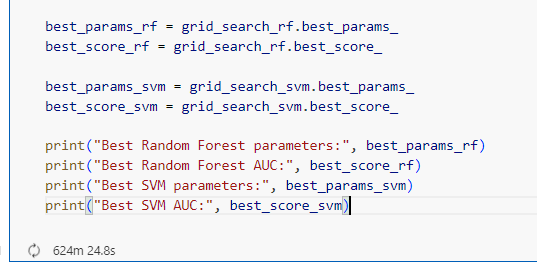

### **Evaluation function**

In [ ]:
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else [0] * len(y_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, roc_auc, precision, recall, f1


### **Results Generated**

In [ ]:

models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'SVM': svm,
    'XGBoost': xgb,
    'k-NN': knn,
    'Naive Bayes': nb
}

results = []
for model_name, model in models.items():
    acc, auc, prec, rec, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'ROC AUC': auc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
print(results_df)



                 Model  Accuracy   ROC AUC  Precision    Recall  F1 Score
0  Logistic Regression  0.568866  0.602885   0.564980  0.598765  0.581382
1        Random Forest  0.614921  0.670765   0.595084  0.719232  0.651295
2                  SVM  0.573736  0.602532   0.560363  0.684510  0.616246
3              XGBoost  0.607398  0.652669   0.596549  0.663580  0.628282
4                 k-NN  0.515287  0.485274   0.511391  0.686343  0.586089
5          Naive Bayes  0.555507  0.605084   0.580546  0.400077  0.473705


<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;"> Task 7– Conclusions and Future Work</p>

### 1. Summary

The models were trained to predict potential successful candidates for Wikipedia administrator elections. Here are the achieved results:
The **Random Forest** model performed the best, achieving the highest accuracy, ROC AUC, and F1 score, indicating it is the most effective model for this task.

### 2. Comparing results to the expected or desired outcomes in the original plan.

The original plan aimed to optimize the administrator election process by accurately predicting successful candidates. The Random Forest model, with its highest performance metrics, aligns well with these expectations, demonstrating the capability to predict potential administrators effectively. However, the overall accuracy levels indicate room for improvement to meet higher standards of prediction reliability.

### 3. The generated value

The analysis and selected prediction algorithms help the organization by providing a data-driven approach to identify promising candidates for Wikipedia's administrator elections. This streamlines the election process, reduces the time and effort required for community discussions, and ensures that capable users are promoted efficiently. This improves the quality and maintenance of Wikipedia, enhancing user experience and fostering community trust.

### 4. Recommended course of action for the organization.

The organization should implement the Random Forest model for predicting potential administrators due to its superior performance. Additionally, continuous monitoring and refinement of the model should be conducted based on community feedback and new data. Integrating this prediction system with Wikipedia's adminship request process will streamline candidate selection and improve overall election efficiency.

### 5. Reflect on limitations and possible pitfalls of using these results.

Potential limitations include the risk of overfitting with complex models like Random Forests, the variability of model performance with different datasets, and the need for high-quality, comprehensive data for training. There's also a challenge in ensuring the models remain unbiased and fair, particularly in a community-driven platform like Wikipedia.

### 6. Methodology

The methodology involved graph analysis, feature engineering, and training multiple models. While effective, improvements could include:
- **Feature Engineering**: Incorporating more sophisticated features related to user behavior and interactions.
- **Hyperparameter Tuning**: Using more advanced techniques like cross-validation, which was conducted once but discarded later due to computational expense.

### 7. Future work

- **Explore Graph Neural Networks (GNNs)**: Given their capability to handle graph-structured data effectively, GNNs could potentially improve prediction accuracy.
- **Temporal Dynamics**: Incorporating temporal aspects of user interactions to capture changes over time.
- **Ensemble Methods**: Develop ensemble methods that combine the strengths of different models for improved predictions.
- **Scalability**: Optimize the computational efficiency of the models to handle larger datasets more effectively.
- **Bias Mitigation**: Implement techniques to identify and mitigate potential biases in the prediction models.